In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata

In [2]:
arch_df = pd.read_json('arch_linux_data.json')
arch_df

,repo,language,readme_contents
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https..."
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...
...,...,...,...
1095,gmas/home-router-ansible,Ruby,# home-router-ansible\nAnsible scripts for set...
1096,Voltasalt/tial,Shell,# tial\nTwitch Installs Arch Linux: Scripts\n
1097,Caesim404/sikulix-git,Shell,
1098,danboid/ZALARM-install,None,# Installing Arch Linux ARM (ALARM) on the SHA...


In [3]:
arch_df = arch_df[arch_df.language.notnull()].reset_index().drop(columns= 'index')
arch_df

,repo,language,readme_contents
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https..."
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...
...,...,...,...
979,archclassroom/archclassroom.github.io,HTML,# archclassroom.github.io\nArch Linux Classroo...
980,gmas/home-router-ansible,Ruby,# home-router-ansible\nAnsible scripts for set...
981,Voltasalt/tial,Shell,# tial\nTwitch Installs Arch Linux: Scripts\n
982,Caesim404/sikulix-git,Shell,


In [4]:
# Constants for the NLP project

ADDITIONAL_STOPWORDS = [
    'sudo',
    'distro',
    'linux',
    'aptget',
    'ubuntu',
    'debian',
    'arch',
    'archlinux',
    'git',
    'root',
    'img', 'instal', 'use', 'user', 'packag', 'file', 'run', 'system', 'configur', 'script', 'set', 'build', 
    'need', 'make', 'option', 'creat', 'default'
] 

def clean_data(text):
    ps = nltk.porter.PorterStemmer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[\(<\"]?http.*[\)>\"\s]', ' ', text).split()
    words = [re.sub(r'[^\w\s]', '', text) for text in words]
    try:
        while True:
            words.remove('')
    except ValueError:
        pass
    
    return [ps.stem(word) for word in words if word not in stopwords]

In [5]:
arch_df['cleaned_readme'] = arch_df.readme_contents.apply(clean_data)
arch_df['cleaned_length'] = 0

In [6]:
for i in range(len(arch_df.cleaned_readme)):
    arch_df['cleaned_length'][i] = len(arch_df.cleaned_readme[i])

/var/folders/r6/g880v64s6vj401drwcc37nf00000gn/T/ipykernel_17494/1951381642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arch_df['cleaned_length'][i] = len(arch_df.cleaned_readme[i])


In [7]:
arch_df.head()

,repo,language,readme_contents,cleaned_readme,cleaned_length
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...,"[archtitu, instal, github, superlint, src, rea...",227
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...,"[chines, commun, repositori, packag, consist, ...",71
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...,"[archfi, simpl, bash, wizard, instal, boot, of...",98
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https...","[div, aligncent, src, div, instal, lint, pytho...",558
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...,"[ali, bash, instal, ali, also, known, _the, ex...",867


# Exploring Overall Data

In [8]:
arch_df.cleaned_length.describe()

count     984.000000
mean      237.106707
std       440.338129
min         0.000000
25%        33.000000
50%       103.500000
75%       257.000000
max      7434.000000
Name: cleaned_length, dtype: float64

# Visualizing the most common lengths of cleaned readme files

<AxesSubplot:>

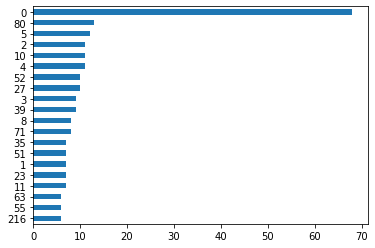

In [9]:
arch_df.cleaned_length.value_counts().head(20).sort_values().plot.barh()

# Visualizing the most common languages of the readme files

<AxesSubplot:>

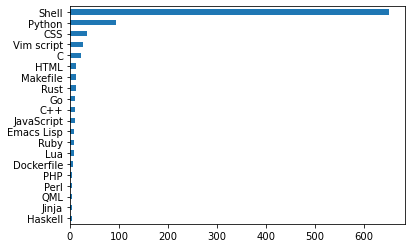

In [10]:
arch_df.language.value_counts().head(20).sort_values().plot.barh()

In [11]:
arch_df.language.dropna()

0       Shell
1       Shell
2       Shell
3      Python
4       Shell
        ...  
979      HTML
980      Ruby
981     Shell
982     Shell
983     Shell
Name: language, Length: 984, dtype: object

In [12]:
arch_df.language.value_counts(normalize=False).head(20).sort_values()

Haskell         4
Jinja           4
QML             5
Perl            5
PHP             5
Dockerfile      7
Lua             9
Ruby            9
Emacs Lisp      9
JavaScript     10
C++            10
Go             10
Rust           13
Makefile       13
HTML           13
C              23
Vim script     26
CSS            35
Python         94
Shell         650
Name: language, dtype: int64

In [13]:
arch_corpus_list = []
language = []
for entry in range(len(arch_df.readme_contents)):
    language.append(arch_df.language[entry])
    arch_corpus_list.extend(clean_data(arch_df.readme_contents[entry]))
arch_corpus = pd.Series(arch_corpus_list)
arch_corpus.describe()

count     233313
unique     26830
top       instal
freq        4202
dtype: object

# Inspecting and visualizing the most common words of cleaned readme files

In [14]:
arch_corpus.value_counts().sort_values(ascending=False).head(20)

instal        4202
packag        2936
use           1957
configur      1433
pacman        1268
file           980
bash           905
creat          896
1              852
boot           829
imag           823
follow         818
command        809
repositori     752
add            738
work           729
updat          720
version        715
chang          710
aur            708
dtype: int64

<AxesSubplot:>

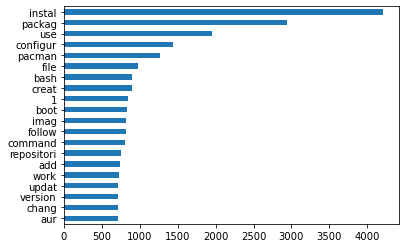

In [15]:
arch_corpus.value_counts().head(20).sort_values().plot.barh()

In [16]:
arch_corpus.nunique()

26830

# Inspecting and visualizing the most bigrams of cleaned readme files

In [17]:
top_20_arch_bigrams = (pd.Series(nltk.ngrams(arch_corpus, 2))
                      .value_counts()
                      .head(20))

In [18]:
top_20_arch_bigrams

(instal, packag)       240
(packag, instal)       198
(aur, packag)          173
(pacman, sr)           154
(sr, mnt)              154
(systemctl, enabl)     145
(desktop, environ)     133
(sh, pacman)           131
(command, line)        127
(configur, file)       124
(follow, command)      118
(clone, cd)            116
(instal, instal)        99
(pacman, noconfirm)     97
(p, aligncent)          95
(sd, card)              90
(environ, variabl)      89
(pull, request)         89
(window, manag)         88
(virtual, machin)       83
dtype: int64

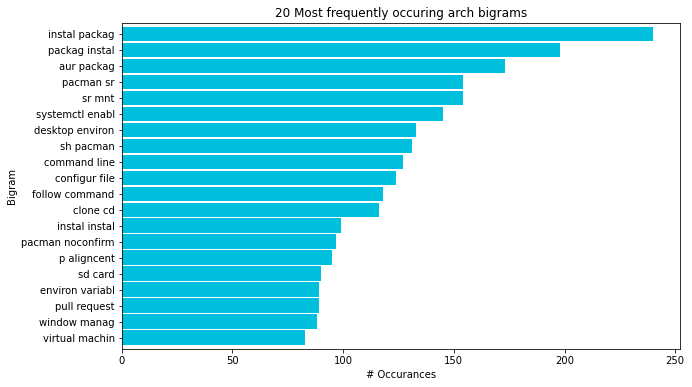

In [19]:
top_20_arch_bigrams.sort_values().plot.barh(color='#00C0DE', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring arch bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_arch_bigrams.reset_index().sort_index(ascending=False)['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


# Inspecting and visualizing the most trigrams of cleaned readme files

In [20]:
top_20_arch_trigrams = (pd.Series(nltk.ngrams(arch_corpus, 3)).value_counts().head(20))
top_20_arch_trigrams

(pacman, sr, mnt)                     154
(sh, pacman, noconfirm)                85
(v, etclocaltimeetclocaltimero, e)     60
(gnu, gener, public)                   54
(gener, public, licens)                53
(archlinuxcn, server, ini)             50
(00, 00, 00)                           36
(pleas, consid, buy)                   34
(puid0, e, pgid0)                      33
(umask000, e, puid0)                   33
(e, umask000, e)                       33
(e, puid0, e)                          33
(p, aligncent, src)                    33
(beer, paypal, donat)                  32
(buy, beer, paypal)                    32
(consid, buy, beer)                    32
(appreci, work, pleas)                 32
(work, pleas, consid)                  32
(issu, follow, command)                31
(paypal, donat, document)              31
dtype: int64

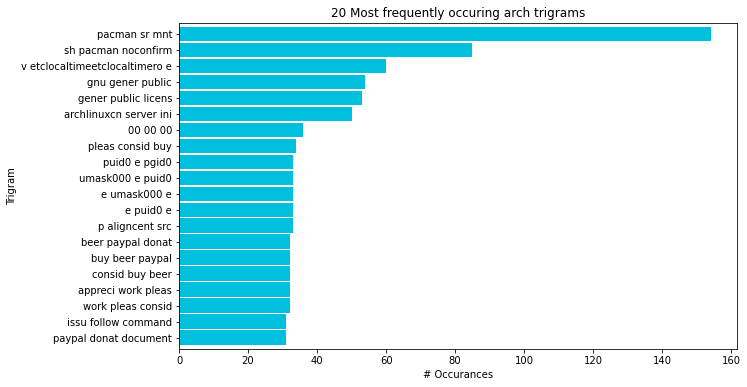

In [21]:
top_20_arch_trigrams.sort_values().plot.barh(color='#00C0DE', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring arch trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_arch_trigrams.reset_index().sort_index(ascending=False)['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)


# Inspecting and visualizing the most quadgrams of cleaned readme files

In [22]:
top_20_arch_quadgrams = (pd.Series(nltk.ngrams(arch_corpus, 4)).value_counts().head(20))
top_20_arch_quadgrams

(gnu, gener, public, licens)          50
(00, 00, 00, 00)                      34
(umask000, e, puid0, e)               33
(e, puid0, e, pgid0)                  33
(e, umask000, e, puid0)               33
(buy, beer, paypal, donat)            32
(work, pleas, consid, buy)            32
(consid, buy, beer, paypal)           32
(appreci, work, pleas, consid)        32
(pleas, consid, buy, beer)            32
(beer, paypal, donat, document)       31
(variabl, command, defin, correct)    28
(replac, variabl, command, defin)     28
(path, config, filesconfig, v)        28
(v, path, config, filesconfig)        28
(___, appreci, work, pleas)           28
(command, defin, correct, valu)       28
(pleas, replac, variabl, command)     28
(puid, group, id, pgid)               27
(file, e, puiduid, e)                 27
dtype: int64

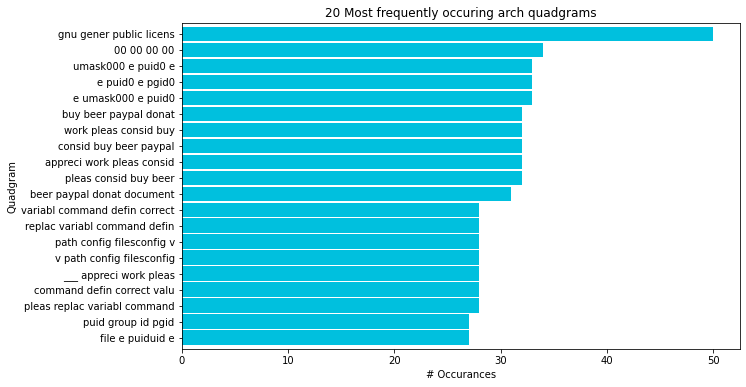

In [23]:
top_20_arch_quadgrams.sort_values().plot.barh(color='#00C0DE', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring arch quadgrams')
plt.ylabel('Quadgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_arch_quadgrams.reset_index().sort_index(ascending=False)['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] + ' ' + t[3])
_ = plt.yticks(ticks, labels)


# Exploring data grouped by language

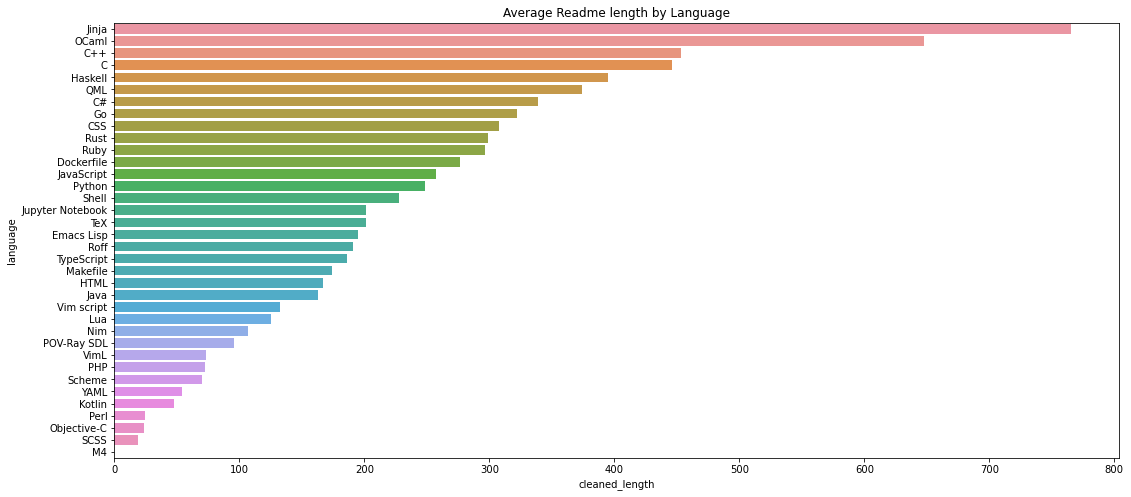

In [24]:
plt.figure(figsize=(18, 8))
sns.barplot(data = arch_df.groupby('language').mean().reset_index().sort_values('cleaned_length', ascending=False), x = 'cleaned_length', y='language')
plt.title('Average Readme length by Language')
plt.show()

In [25]:
arch_df.groupby('language').mean().reset_index().sort_values('cleaned_length', ascending=False)

,language,cleaned_length
11,Jinja,765.250000
18,OCaml,648.000000
2,C++,453.200000
0,C,445.739130
8,Haskell,395.250000
24,QML,374.400000
1,C#,339.000000
6,Go,322.100000
3,CSS,307.942857
27,Rust,298.923077


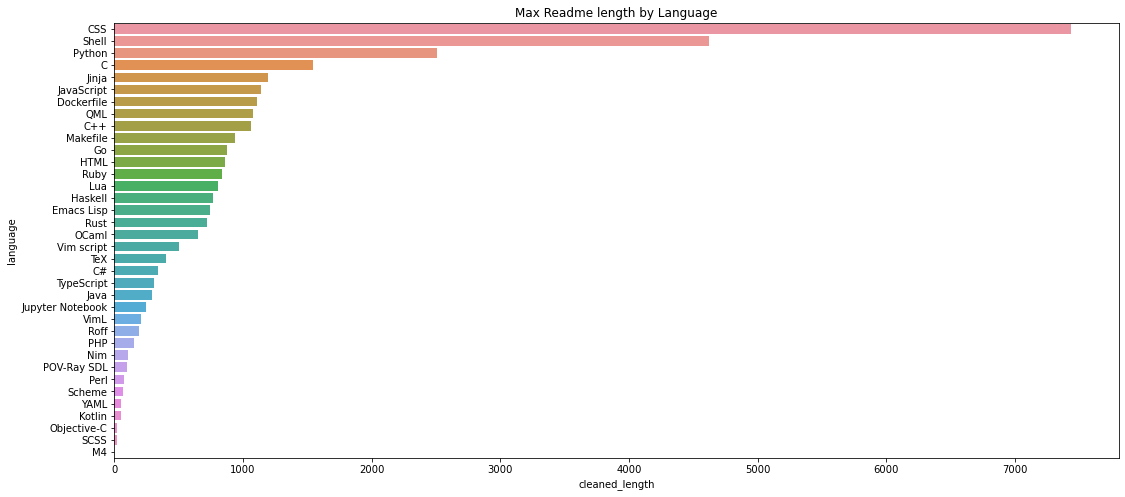

In [26]:
plt.figure(figsize=(18, 8))
sns.barplot(data = arch_df.groupby('language').max().reset_index().sort_values('cleaned_length', ascending=False), x = 'cleaned_length', y='language')
plt.title('Max Readme length by Language')
plt.show()

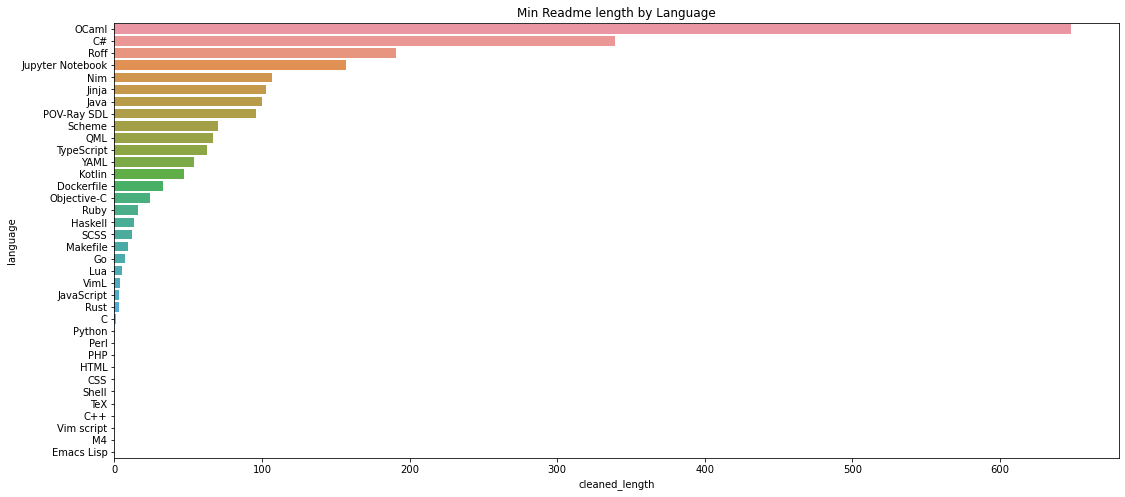

In [27]:
plt.figure(figsize=(18, 8))
sns.barplot(data = arch_df.groupby('language').min().reset_index().sort_values('cleaned_length', ascending=False), x = 'cleaned_length', y='language')
plt.title('Min Readme length by Language')
plt.show()

# Making new dataframes based on language

In [28]:
shell = arch_df.query('language == "Shell"').reset_index()
python = arch_df.query('language == "Python"').reset_index()
css = arch_df.query('language == "CSS"').reset_index()
other_lang = arch_df.query('language != "Shell" & language != "Python" & language != "CSS"').reset_index()

In [29]:
len(shell) + len(python) + len(css) + len(other_lang)

984

In [30]:
shell.head()

,index,repo,language,readme_contents,cleaned_readme,cleaned_length
0,0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...,"[archtitu, instal, github, superlint, src, rea...",227
1,1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...,"[chines, commun, repositori, packag, consist, ...",71
2,2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...,"[archfi, simpl, bash, wizard, instal, boot, of...",98
3,4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...,"[ali, bash, instal, ali, also, known, _the, ex...",867
4,5,windelicato/dotfiles,Shell,Arch Linux configuration files for programs an...,"[configur, file, program, bspwm, requir, full,...",52


In [31]:
shell_corpus_list = []
for entry in range(len(shell)):
    shell_corpus_list.extend(shell.cleaned_readme[entry])
shell_corpus = pd.Series(shell_corpus_list)
shell_corpus.describe()

count     148109
unique     18329
top       instal
freq        2825
dtype: object

In [32]:
python_corpus_list = []
for entry in range(len(python)):
    python_corpus_list.extend(python.cleaned_readme[entry])
python_corpus = pd.Series(python_corpus_list)
python_corpus.describe()

count      23381
unique      4281
top       instal
freq         468
dtype: object

In [33]:
css_corpus_list = []
for entry in range(len(css)):
    css_corpus_list.extend(css.cleaned_readme[entry])
css_corpus = pd.Series(css_corpus_list)
css_corpus.describe()

count     10778
unique     3215
top       color
freq        141
dtype: object

In [34]:
other_lang_corpus_list = []
for entry in range(len(other_lang)):
    other_lang_corpus_list.extend(other_lang.cleaned_readme[entry])
other_lang_corpus = pd.Series(other_lang_corpus_list)
other_lang_corpus.describe()

count      51045
unique      8420
top       instal
freq         813
dtype: object

In [35]:
shell_freq = pd.Series(shell_corpus).value_counts()
python_freq = pd.Series(python_corpus).value_counts()
css_freq = pd.Series(css_corpus).value_counts()
other_lang_freq = pd.Series(other_lang_corpus).value_counts()
all_words_freq = pd.Series(arch_corpus).value_counts()

In [36]:
word_counts = (pd.concat([all_words_freq, shell_freq, python_freq, css_freq, other_lang_freq], axis=1, sort=True)
                .set_axis(['all', 'shell', 'python', 'css', 'other_langs'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,shell,python,css,other_langs
0,266,134,28,44,60
00,47,44,0,3,0
000,2,1,0,1,0
0000,13,13,0,0,0
000000,1,0,0,0,1


In [37]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,shell,python,css,other_langs
instal,4202,2825,468,96,813
packag,2936,1782,466,9,679
use,1957,1211,203,85,458
configur,1433,902,169,22,340
pacman,1268,983,93,3,189
file,980,581,104,9,286
bash,905,711,71,3,120
creat,896,592,112,6,186
1,852,597,78,33,144
boot,829,693,41,1,94


<Figure size 1296x576 with 0 Axes>

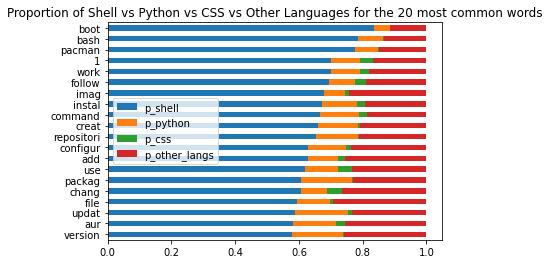

In [38]:
# figure out the percentage of shell vs python vs css vs other
plt.figure(figsize=(18,8))
(word_counts
 .assign(p_shell=word_counts.shell / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_css=word_counts.css / word_counts['all'],
         p_other_langs=word_counts.other_langs / word_counts['all'])
 .sort_values(by='all')
 [['p_shell', 'p_python', 'p_css', 'p_other_langs']]
 .tail(20)
 .sort_values('p_shell')
 .plot.barh(stacked=True))

plt.title('Proportion of Shell vs Python vs CSS vs Other Languages for the 20 most common words')
plt.show()

In [39]:
top_20 = pd.Series(word_counts.sort_values(by='all', ascending=False).head(20).index)

In [40]:
top_20_totals = []
for i in top_20:
    total = 0
    for j in range(len(shell)):
        if i in shell.cleaned_readme[j]:
            total +=1
    top_20_totals.append(round(total /len(shell), 4))
shell_top_20_percentages = top_20_totals

In [41]:
top_20_totals = []
for i in top_20:
    total = 0
    for j in range(len(python)):
        if i in python.cleaned_readme[j]:
            total +=1
    top_20_totals.append(round(total /len(python), 4))
python_top_20_percentages = top_20_totals

In [42]:
top_20_totals = []
for i in top_20:
    total = 0
    for j in range(len(css)):
        if i in css.cleaned_readme[j]:
            total +=1
    top_20_totals.append(round(total /len(css), 4))
css_top_20_percentages = top_20_totals

In [43]:
top_20_totals = []
for i in top_20:
    total = 0
    for j in range(len(other_lang)):
        if i in other_lang.cleaned_readme[j]:
            total +=1
    top_20_totals.append(round(total /len(other_lang), 4))
other_lang_top_20_percentages = top_20_totals

In [44]:
top_20_percentage = pd.DataFrame({"top_20_words": top_20, 'shell': shell_top_20_percentages, 'python': python_top_20_percentages, 'css': css_top_20_percentages, 'other_langs': other_lang_top_20_percentages})

<AxesSubplot:>

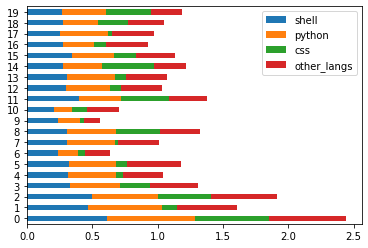

In [45]:
top_20_percentage.plot.barh(stacked=True)

# Pulling in all jsons to one large dataframe

In [47]:
arch_df = pd.read_json('arch_linux_data.json')
arch_df

,repo,language,readme_contents
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https..."
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...
...,...,...,...
1095,gmas/home-router-ansible,Ruby,# home-router-ansible\nAnsible scripts for set...
1096,Voltasalt/tial,Shell,# tial\nTwitch Installs Arch Linux: Scripts\n
1097,Caesim404/sikulix-git,Shell,
1098,danboid/ZALARM-install,None,# Installing Arch Linux ARM (ALARM) on the SHA...


In [49]:
debian_df = pd.read_json('debian_data.json')
debian_df

,repo,language,readme_contents
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...
...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...


In [50]:
ubuntu_df = pd.read_json('ubuntu_data.json')
ubuntu_df

,repo,language,readme_contents
0,dockerfile/ubuntu,Shell,## Ubuntu Dockerfile\n\n\nThis repository cont...
1,boxcutter/ubuntu,Shell,# Packer templates for Ubuntu written in legac...
2,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...
3,fcwu/docker-ubuntu-vnc-desktop,HTML,# docker-ubuntu-vnc-desktop\n\n[![Docker Pulls...
4,docker-32bit/ubuntu,Shell,ubuntu\n======\n\nBuild a docker image for ubu...
...,...,...,...
1095,kurniawandata/nasihosting,PHP,# nasihosting\n\nNasihosting v5.2\n-----------...
1096,mastermindg/trac-docker-ubuntu,Shell,# trac-ubuntu\n\n[![](https://images.microbadg...
1097,hortonworks/docker-protractor,Shell,**General Docker image for executing headless ...
1098,rubiojr/surface3-kernel,C,Linux kernel release 3.x <http://kerne...


In [53]:
master_list = pd.concat([ubuntu_df, debian_df, arch_df])

In [54]:
master_list.to_csv('master_list.csv')